# Summer 2021 -> INSY 5379 -> Capstone Project
### UTA MSBA students: 
- Phanikrishna Karanam
- Swetha Gollamudi
- Joel Andrews

#### Analysis on data extracted for Brand Promise 

__Summary__: This notebook analyzes the data extracted using the generic web scraper for Brand Promise of Health IT vendors

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
# set below options to review complete DataFrame in output cells
# Note: load time and processing will be higher  

#pd.set_option('max_rows', None)
#pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', -1)

In [3]:
in_file = r'C:\MSBA\Summer 2021\INSY 5379 - Capstone Project\Task 2\HIT Vendors.xlsx'
Brandpromise_file = r'C:\MSBA\Summer 2021\INSY 5379 - Capstone Project\Task 2\HIT Output - Brand Promise.csv'
out_file = r'C:\MSBA\Summer 2021\INSY 5379 - Capstone Project\Task 2\Brand Promise - Counts.csv'
cluster_file = r'C:\MSBA\Summer 2021\INSY 5379 - Capstone Project\Task 2\Cluster - Brand Promise.csv'
model_inp_file = r'C:\MSBA\Summer 2021\INSY 5379 - Capstone Project\Task 2\Model Build - Input BP.csv'

data_brandpromise = pd.read_csv(Brandpromise_file)
data_brandpromise = data_brandpromise.drop_duplicates() 

data_inp = pd.read_excel(in_file)
data_inp = data_inp.drop_duplicates(subset = ['Name']) 

# Merge data to get respective links
data = pd.merge(data_brandpromise, data_inp, left_on = 'Company Name', right_on = 'Name')
data

,Company Name,Claim,Modifier,Evidence,Link,Name,Website
0,MEDHOST,time,reduc,No one like surprises or hidden fees. Enjoy a ...,http://www.medhost.com/,MEDHOST,http://www.medhost.com/
1,MEDHOST,revenue,improv,Reinforce your business office without adding ...,http://www.medhost.com/,MEDHOST,http://www.medhost.com/
2,MEDHOST,process,enhanc,Enhance your clinical and financial performanc...,http://www.medhost.com/ehr/,MEDHOST,http://www.medhost.com/
3,MEDHOST,performance,enhanc,Enhance your clinical and financial performanc...,http://www.medhost.com/ehr/,MEDHOST,http://www.medhost.com/
4,MEDHOST,care coordination,improv,For hospitals and healthcare facilities strivi...,http://www.medhost.com/ehr/,MEDHOST,http://www.medhost.com/
...,...,...,...,...,...,...,...
53261,Bamboo Agile,performance,allow,Our partnership with Shopify allows us to crea...,https://bambooagile.eu/technologies/vue,Bamboo Agile,https://bambooagile.eu/industries/healthcare
53262,Bamboo Agile,performance,allow,Dialplan forms the core of any Asterisk-based ...,https://bambooagile.eu/technologies/asterisk,Bamboo Agile,https://bambooagile.eu/industries/healthcare
53263,Bamboo Agile,performance,enhanc,Asterisk Gateway Interface is one of the most ...,https://bambooagile.eu/technologies/asterisk,Bamboo Agile,https://bambooagile.eu/industries/healthcare
53264,Bamboo Agile,performance,allow,Asterisk Gateway Interface is one of the most ...,https://bambooagile.eu/technologies/asterisk,Bamboo Agile,https://bambooagile.eu/industries/healthcare


In [4]:
# Getting the counts for unique Claims + Modifiers

data['cm'] = data['Claim'] + ' | ' + data['Modifier'] 
data_dummies = pd.get_dummies(data[['cm']])
data_merged_list = [data, data_dummies]
data_merged = pd.concat(data_merged_list, axis = 1, join = 'outer')

data_counts = data_merged.groupby(['Company Name']).sum()
data_counts = data_counts.reset_index()

data_counts

,Company Name,cm_access | enhanc,cm_access | improv,cm_access | increas,cm_care coordination | enhanc,cm_care coordination | improv,cm_care coordination | insight,cm_care coordination | optimiz,cm_care gap | clos,cm_care gap | identify,...,cm_time | reduc,cm_utilization | allow,cm_utilization | decreas,cm_utilization | facilitat,cm_utilization | lower,cm_utilization | optimiz,cm_utilization | reduc,cm_visit | decreas,cm_visit | lower,cm_visit | reduc
0,314e Corporation,1,3,0,0,1,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
1,4PatientCare,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"A1 Enterprise, Inc.",0,0,1,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
3,ACF Technologies,0,0,1,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,3
4,ACG Infotech Ltd.,1,2,0,0,0,0,0,0,0,...,6,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,nVoq,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
628,pCare,0,2,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
629,pMD,1,3,3,0,1,0,0,0,0,...,14,0,0,0,0,0,0,1,0,1
630,physIQ,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Merging Claims
data['Claim_combined'] = data.groupby(['Company Name'])['Claim'].transform(lambda x : ' | '.join(x))

# Merging Modifiers
data['Modifier_combined'] = data.groupby(['Company Name'])['Modifier'].transform(lambda x : ' | '.join(x))

# Merging Claims and Modifiers
data['merged'] = data['Claim'] + ', ' + data['Modifier'] 
data['Claim_Modifier'] = data.groupby(['Company Name'])['merged'].transform(lambda x : ' | '.join(x))

data = data.drop(['Claim', 'Modifier', 'Evidence', 'Link', 'merged', 'cm', 'Name'], axis = 1)
data = data.drop_duplicates() 
data = data.reset_index(drop=True)

data

,Company Name,Website,Claim_combined,Modifier_combined,Claim_Modifier
0,MEDHOST,http://www.medhost.com/,time | revenue | process | performance | care ...,reduc | improv | enhanc | enhanc | improv | im...,"time, reduc | revenue, improv | process, enhan..."
1,nThrive,http://www.nthrive.com/,satisfaction | satisfaction | revenue | access...,improv | increas | increas | increas | reduc |...,"satisfaction, improv | satisfaction, increas |..."
2,TrialStat Solutions Inc.,https://www.trialstat.com,data | data | data | data | data | interoperab...,reduc | allow | allow | allow | allow | integr...,"data, reduc | data, allow | data, allow | data..."
3,Curve Dental,http://www.curvedental.com,data | report | access | time | patient engage...,improv | improv | improv | reduc | enhanc | ai...,"data, improv | report, improv | access, improv..."
4,VetSuccess,http://www.vetsuccess.com,revenue | performance | performance | revenue ...,increas | allow | allow | increas | increas | ...,"revenue, increas | performance, allow | perfor..."
...,...,...,...,...,...
627,StoriiCare,https://storiicare.com,care management | efficiency | report | care m...,better | improv | improv | allow | reduc | all...,"care management, better | efficiency, improv |..."
628,"Chetu, Inc.",https://www.chetu.com/healthcare.php,interoperability | interoperability | data | e...,improv | enhanc | allow | improv | enhanc | en...,"interoperability, improv | interoperability, e..."
629,TractManager,https://www.tractmanager.com/,data | data | data | performance | performance,better | improv | optimiz | improv | measur,"data, better | data, improv | data, optimiz | ..."
630,Claimocity,https://claimocity.com,satisfaction | revenue | efficiency | efficien...,increas | increas | increas | increas | enhanc...,"satisfaction, increas | revenue, increas | eff..."


In [6]:
final_data = pd.merge(data, data_counts, on = 'Company Name')
final_data.to_csv(out_file, index = False)

final_data

,Company Name,Website,Claim_combined,Modifier_combined,Claim_Modifier,cm_access | enhanc,cm_access | improv,cm_access | increas,cm_care coordination | enhanc,cm_care coordination | improv,...,cm_time | reduc,cm_utilization | allow,cm_utilization | decreas,cm_utilization | facilitat,cm_utilization | lower,cm_utilization | optimiz,cm_utilization | reduc,cm_visit | decreas,cm_visit | lower,cm_visit | reduc
0,MEDHOST,http://www.medhost.com/,time | revenue | process | performance | care ...,reduc | improv | enhanc | enhanc | improv | im...,"time, reduc | revenue, improv | process, enhan...",3,10,8,1,7,...,8,0,0,0,0,0,0,0,0,1
1,nThrive,http://www.nthrive.com/,satisfaction | satisfaction | revenue | access...,improv | increas | increas | increas | reduc |...,"satisfaction, improv | satisfaction, increas |...",0,5,4,0,0,...,6,0,0,0,0,0,0,0,0,0
2,TrialStat Solutions Inc.,https://www.trialstat.com,data | data | data | data | data | interoperab...,reduc | allow | allow | allow | allow | integr...,"data, reduc | data, allow | data, allow | data...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Curve Dental,http://www.curvedental.com,data | report | access | time | patient engage...,improv | improv | improv | reduc | enhanc | ai...,"data, improv | report, improv | access, improv...",0,2,2,0,0,...,4,0,0,0,0,0,0,0,0,0
4,VetSuccess,http://www.vetsuccess.com,revenue | performance | performance | revenue ...,increas | allow | allow | increas | increas | ...,"revenue, increas | performance, allow | perfor...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,StoriiCare,https://storiicare.com,care management | efficiency | report | care m...,better | improv | improv | allow | reduc | all...,"care management, better | efficiency, improv |...",0,3,1,0,0,...,11,0,0,0,0,0,0,0,0,1
628,"Chetu, Inc.",https://www.chetu.com/healthcare.php,interoperability | interoperability | data | e...,improv | enhanc | allow | improv | enhanc | en...,"interoperability, improv | interoperability, e...",5,8,4,0,0,...,10,0,0,0,0,0,0,0,0,0
629,TractManager,https://www.tractmanager.com/,data | data | data | performance | performance,better | improv | optimiz | improv | measur,"data, better | data, improv | data, optimiz | ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,Claimocity,https://claimocity.com,satisfaction | revenue | efficiency | efficien...,increas | increas | increas | increas | enhanc...,"satisfaction, increas | revenue, increas | eff...",1,9,4,0,0,...,26,0,0,0,0,0,0,0,0,3


In [7]:
model_data = final_data.set_index('Company Name')
model_data = model_data.drop(['Website', 'Claim_combined', 'Modifier_combined', 'Claim_Modifier'], axis = 1)
dtm = model_data.values

model_data

,cm_access | enhanc,cm_access | improv,cm_access | increas,cm_care coordination | enhanc,cm_care coordination | improv,cm_care coordination | insight,cm_care coordination | optimiz,cm_care gap | clos,cm_care gap | identify,cm_care gap | reduc,...,cm_time | reduc,cm_utilization | allow,cm_utilization | decreas,cm_utilization | facilitat,cm_utilization | lower,cm_utilization | optimiz,cm_utilization | reduc,cm_visit | decreas,cm_visit | lower,cm_visit | reduc
Company Name,,,,,,,,,,,,,,,,,,,,,
MEDHOST,3,10,8,1,7,0,1,0,0,0,...,8,0,0,0,0,0,0,0,0,1
nThrive,0,5,4,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
TrialStat Solutions Inc.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Curve Dental,0,2,2,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
VetSuccess,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
StoriiCare,0,3,1,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,0,0,1
"Chetu, Inc.",5,8,4,0,0,0,1,0,0,0,...,10,0,0,0,0,0,0,0,0,0
TractManager,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
word_freq = model_data.sum(axis=0).values
terms = ' , '.join(list(model_data.columns)).replace('cm_', '').split(' , ')

freq_list = list(zip(terms, word_freq))
freq_dict = dict(freq_list)

df_freq = pd.DataFrame(freq_list, columns = ['Claim_Modifier', 'Freq'])

df_freq.sort_values(by = ['Freq'], ascending = False, inplace = True)
df_freq

,Claim_Modifier,Freq
26,data | improv,3307
55,outcome | improv,3039
107,time | reduc,2822
21,data | automat,2523
33,efficiency | improv,2128
...,...,...
9,care gap | reduc,13
36,emergency department | prevent,12
104,star rating | improv,11
37,gap in care | clos,2


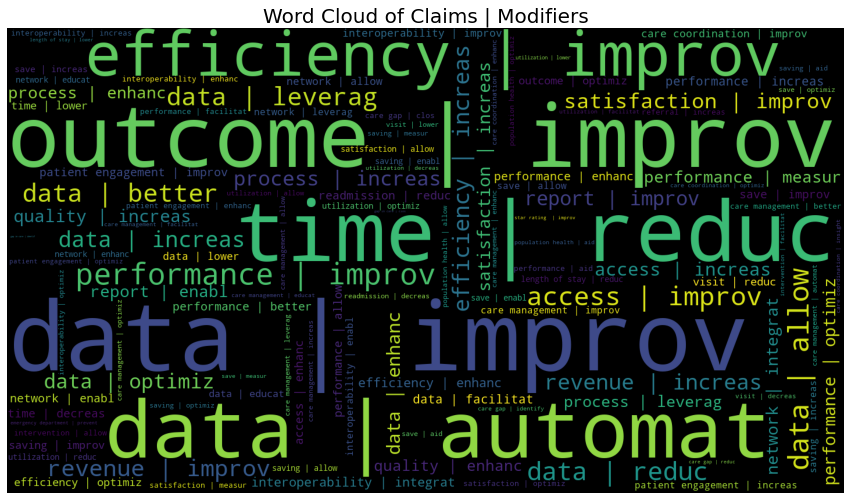

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1440, height = 800, relative_scaling = 0.5) \
                      .generate_from_frequencies(freq_dict)

plt.figure(figsize=(15, 15))
#plt.imshow(wordcloud, interpolation = 'bilinear')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Claims | Modifiers', fontsize = 20)
plt.show()

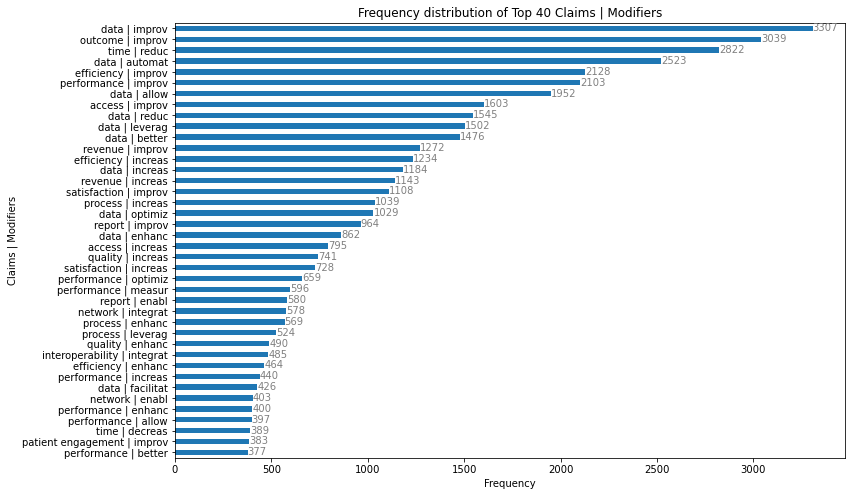

In [10]:
plot = df_freq.groupby('Claim_Modifier')['Freq'].sum() \
              .sort_values(ascending = False)[:40] \
              .sort_values(ascending = True) \
              .plot(kind='barh', figsize=(12,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('Frequency distribution of Top 40 Claims | Modifiers')
plot.set_xlabel('Frequency') 
plot.set_ylabel('Claims | Modifiers')
plt.show()

In [11]:
from sklearn.cluster import KMeans

dtm = model_data.values
company_name = list(model_data.index)

km = KMeans(n_clusters = 10, random_state = 337)
cluster_solution = km.fit(dtm)
cluster_membership = km.predict(dtm)
dist_to_cluster = km.transform(dtm)
 
cluster_dict = {'Company Name': company_name,
                'Cluster Num': cluster_membership, 
                'D_2_C_0': dist_to_cluster[:, 0], 
                'D_2_C_1': dist_to_cluster[:, 1], 
                'D_2_C_2': dist_to_cluster[:, 2],
                'D_2_C_3': dist_to_cluster[:, 3],
                'D_2_C_4': dist_to_cluster[:, 4],
                'D_2_C_5': dist_to_cluster[:, 5],
                'D_2_C_6': dist_to_cluster[:, 6],
                'D_2_C_7': dist_to_cluster[:, 7],
                'D_2_C_8': dist_to_cluster[:, 8],
                'D_2_C_9': dist_to_cluster[:, 9]
                #'D_2_C_10': dist_to_cluster[:, 10],
                #'D_2_C_11': dist_to_cluster[:, 11],
                #'D_2_C_12': dist_to_cluster[:, 12],
                #'D_2_C_13': dist_to_cluster[:, 13],
                #'D_2_C_14': dist_to_cluster[:, 14],
                #'D_2_C_15': dist_to_cluster[:, 15],
                #'D_2_C_16': dist_to_cluster[:, 16],
                #'D_2_C_17': dist_to_cluster[:, 17],
                #'D_2_C_18': dist_to_cluster[:, 18],
                #'D_2_C_19': dist_to_cluster[:, 19]
               }

df_clusters = pd.DataFrame(cluster_dict) 
cluster_num = df_clusters['Cluster Num'].values.tolist()

df_clusters['Cluster Num'].value_counts(sort = False)

0    382
1      8
2      1
3     46
4     17
5      4
6     17
7      2
8    154
9      1
Name: Cluster Num, dtype: int64

In [12]:
#df_clusters.sort_values(by = ['Cluster Num'], inplace = True)
#df_clusters.reset_index(drop = True, inplace = True)

df_clusters.to_csv(cluster_file, index = False)
df_clusters

,Company Name,Cluster Num,D_2_C_0,D_2_C_1,D_2_C_2,D_2_C_3,D_2_C_4,D_2_C_5,D_2_C_6,D_2_C_7,D_2_C_8,D_2_C_9
0,MEDHOST,8,36.142208,67.149786,277.331931,30.024329,28.426254,111.661598,50.097828,107.681243,27.494496,173.579953
1,nThrive,8,29.976650,74.083357,283.906675,27.664596,30.996093,112.041566,52.136964,110.567852,23.459538,181.019336
2,TrialStat Solutions Inc.,0,6.466795,90.334621,297.593683,30.512711,48.794818,122.244887,56.567227,120.823218,15.705878,192.366837
3,Curve Dental,0,8.965469,83.314727,292.124973,25.042214,40.648336,117.804128,52.568426,115.569243,9.164404,186.021504
4,VetSuccess,0,7.112599,89.879607,297.867420,30.494894,47.093700,122.846703,57.623765,120.852182,15.060029,192.572064
...,...,...,...,...,...,...,...,...,...,...,...,...
627,StoriiCare,8,13.952896,84.676406,290.356677,27.358003,43.935034,115.166456,49.129164,116.847122,13.597624,183.117449
628,"Chetu, Inc.",6,95.756905,87.574789,232.817525,78.724502,86.774855,80.751548,53.289151,100.091208,89.242552,163.801709
629,TractManager,0,3.379575,91.209066,300.163289,31.501268,48.640266,124.474144,59.457088,122.058388,15.629619,194.368207
630,Claimocity,4,70.884410,70.794377,259.726780,59.147784,49.912796,103.724696,64.164068,104.509569,62.530818,157.889202


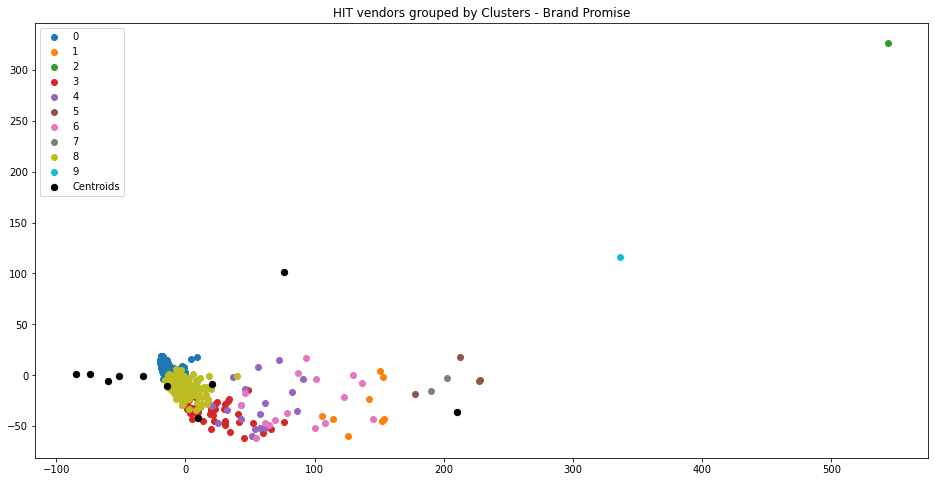

In [13]:
from sklearn.decomposition import PCA

centroids = km.cluster_centers_

pca = PCA(2)
 
# Transform the data
df = pca.fit_transform(dist_to_cluster)
df_cent = pca.fit_transform(centroids)

# Get unique labels
u_labels = np.unique(cluster_membership)

plt.figure(figsize=(16,8))

#plotting the results:
for i in u_labels:
    plt.scatter(df[cluster_membership == i, 0], df[cluster_membership == i, 1] , label = i)
    # Use below to eliminate any outlier clusters
    #if i not in [1, 8]:
    #    plt.scatter(df[cluster_membership == i, 0], df[cluster_membership == i, 1] , label = i)

plt.scatter(df_cent[:,0], df_cent[:,1], s = 40, color = 'k', label = 'Centroids')
plt.legend()
plt.title('HIT vendors grouped by Clusters - Brand Promise')
plt.show()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(dtm)
cos_distance = 1 - similarity

df_cos_distance = pd.DataFrame(cos_distance, columns = company_name, index = company_name)
df_cos_distance

,MEDHOST,nThrive,TrialStat Solutions Inc.,Curve Dental,VetSuccess,Medical Billing,PROTEUS 420,Cirius Group Inc.,CentralReach,Nextech Systems,...,Modernizing Medicine,Episode Alert,McKesson,ScienceSoft,SYFT,StoriiCare,"Chetu, Inc.",TractManager,Claimocity,Bamboo Agile
MEDHOST,-2.220446e-16,0.262700,7.367690e-01,3.007210e-01,7.710706e-01,0.746641,0.756673,0.598577,0.380873,0.386585,...,0.378288,0.746940,0.250889,0.475049,0.437489,6.023399e-01,5.392270e-01,7.236079e-01,3.143698e-01,4.588591e-01
nThrive,2.626996e-01,0.000000,8.571228e-01,3.288265e-01,6.622956e-01,0.640480,0.742897,0.375199,0.404512,0.406230,...,0.367864,0.929881,0.383335,0.484606,0.388590,6.394999e-01,6.176340e-01,6.957912e-01,3.209984e-01,5.873808e-01
TrialStat Solutions Inc.,7.367690e-01,0.857123,-2.220446e-16,7.139206e-01,8.399478e-01,0.749510,0.629521,1.000000,0.794359,0.874129,...,0.641580,0.364893,0.918193,0.461143,0.803328,7.221066e-01,4.911943e-01,9.373776e-01,8.663024e-01,4.876785e-01
Curve Dental,3.007210e-01,0.328827,7.139206e-01,-4.440892e-16,5.999942e-01,0.619307,0.613906,0.754263,0.328503,0.398282,...,0.202301,0.710430,0.303749,0.331906,0.386465,3.612085e-01,5.312659e-01,6.193065e-01,3.021763e-01,4.110404e-01
VetSuccess,7.710706e-01,0.662296,8.399478e-01,5.999942e-01,1.110223e-16,0.659223,0.471983,1.000000,0.664285,0.808004,...,0.572997,0.903997,0.739034,0.606449,0.708968,7.400850e-01,6.458204e-01,7.160191e-01,5.565396e-01,6.306578e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
StoriiCare,6.023399e-01,0.639500,7.221066e-01,3.612085e-01,7.400850e-01,0.667180,0.648395,0.964194,0.489971,0.700993,...,0.453822,0.601514,0.565217,0.323599,0.543847,-2.220446e-16,4.603051e-01,8.613250e-01,5.719696e-01,5.418297e-01
"Chetu, Inc.",5.392270e-01,0.617634,4.911943e-01,5.312659e-01,6.458204e-01,0.790617,0.472964,0.923607,0.554143,0.639443,...,0.437889,0.723018,0.698789,0.194176,0.509441,4.603051e-01,2.220446e-16,7.450988e-01,6.276611e-01,3.242100e-01
TractManager,7.236079e-01,0.695791,9.373776e-01,6.193065e-01,7.160191e-01,1.000000,0.661938,0.741801,0.568413,0.689365,...,0.558611,1.000000,0.738728,0.601459,0.702469,8.613250e-01,7.450988e-01,1.110223e-16,6.706031e-01,6.224099e-01
Claimocity,3.143698e-01,0.320998,8.663024e-01,3.021763e-01,5.565396e-01,0.560804,0.633967,0.629875,0.490066,0.281069,...,0.346416,0.809250,0.372395,0.504668,0.214543,5.719696e-01,6.276611e-01,6.706031e-01,2.220446e-16,4.497725e-01


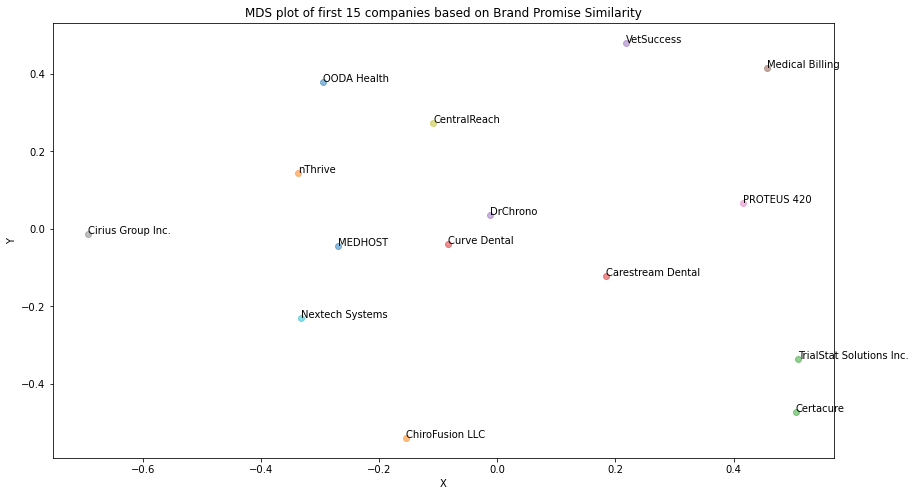

In [15]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)

# Use below to plot all companies
#pos = mds.fit_transform(cos_distance)

# Use below to plot first 15 companies
pos = mds.fit_transform(cos_distance[:15, :15])
xs, ys = pos[:, 0], pos[:, 1]

plt.figure(figsize=(14,8))

# Use below to plot all points (names not on plot)
#for x, y in zip(xs, ys):
    #plt.scatter(x, y, alpha=0.5)
    #plt.text(x, y)

# Use below to plot first 15 companies
for x, y, name in zip(xs, ys, company_name[:15]):
    plt.scatter(x, y, alpha=0.5)
    plt.text(x, y, name)
    
plt.title('MDS plot of first 15 companies based on Brand Promise Similarity')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

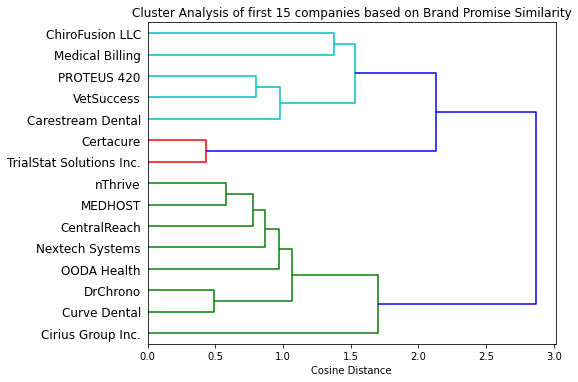

In [16]:
from scipy.cluster.hierarchy import ward, dendrogram

#plt.figure(figsize=(12,50))

# Use below to plot all companies
#linkage_matrix = ward(cos_distance)
#dendrogram(linkage_matrix, orientation = 'right', labels = company_name)

plt.figure(figsize=(8,5))

# Use below to plot first 15 companies
linkage_matrix = ward(cos_distance[:15, :15])
dendrogram(linkage_matrix, orientation = 'right', labels = company_name[:15])

plt.tight_layout()
plt.title('Cluster Analysis of first 15 companies based on Brand Promise Similarity')
plt.xlabel('Cosine Distance')
plt.show()

In [17]:
df_model_inp = model_data
df_model_inp['Target'] = cluster_membership

df_model_inp.to_csv(model_inp_file, index = True)

# Let us view the Target label distribution
df_model_inp['Target'].value_counts(sort = False)

0    382
1      8
2      1
3     46
4     17
5      4
6     17
7      2
8    154
9      1
Name: Target, dtype: int64

In [18]:
# Let us drop Target class [2, 5, 7, 9] as # of records are very low

df_model_inp = df_model_inp[(df_model_inp['Target'] != 2) & 
                            (df_model_inp['Target'] != 5) &
                            (df_model_inp['Target'] != 7) &
                            (df_model_inp['Target'] != 9)] 

df_model_inp['Target'].value_counts(sort = False)

0    382
1      8
3     46
4     17
6     17
8    154
Name: Target, dtype: int64

In [19]:
#from keras.utils import to_categorical

x_data = df_model_inp.drop('Target', axis=1)
y_data = df_model_inp['Target']
#y_data = to_categorical(df_model_inp['Target'])

print('x_data shape                 :', x_data.shape)
print('y_data shape & target counts : {} {}'.format(y_data.shape, np.unique(y_data, return_counts = True)))

x_data shape                 : (624, 117)
y_data shape & target counts : (624,) (array([0, 1, 3, 4, 6, 8]), array([382,   8,  46,  17,  17, 154], dtype=int64))


In [20]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = \
                    train_test_split(x_data, y_data, test_size = 0.20, stratify = y_data, random_state = 32)

x_train, x_val, y_train, y_val = \
                    train_test_split(x_train_val, y_train_val, test_size = 0.10, stratify = y_train_val, random_state = 32)

print('x_train_val shape                 :', x_train_val.shape)
print('x_train shape                     :', x_train.shape)
print('x_val shape                       :', x_val.shape)
print('x_test shape                      :', x_test.shape)
print('y_train_val shape & target counts : {} {}'.format(y_train_val.shape, np.unique(y_train_val, return_counts = True)))
print('y_train shape & target counts     : {} {}'.format(y_train.shape, np.unique(y_train, return_counts = True)))
print('y_val shape & target counts       : {} {}'.format(y_val.shape, np.unique(y_val, return_counts = True)))
print('y_test shape & target counts      : {} {}\n'.format(y_test.shape, np.unique(y_test, return_counts = True)))

x_train_val shape                 : (499, 117)
x_train shape                     : (449, 117)
x_val shape                       : (50, 117)
x_test shape                      : (125, 117)
y_train_val shape & target counts : (499,) (array([0, 1, 3, 4, 6, 8]), array([305,   6,  37,  14,  14, 123], dtype=int64))
y_train shape & target counts     : (449,) (array([0, 1, 3, 4, 6, 8]), array([274,   5,  33,  13,  13, 111], dtype=int64))
y_val shape & target counts       : (50,) (array([0, 1, 3, 4, 6, 8]), array([31,  1,  4,  1,  1, 12], dtype=int64))
y_test shape & target counts      : (125,) (array([0, 1, 3, 4, 6, 8]), array([77,  2,  9,  3,  3, 31], dtype=int64))



In [21]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

# Below function will define the simple Neural Network that accepts necessary parameters that can be configured: 
# Note: although only 8 target variables are present, output nodes are mentioned as 10 since largest label value is 9

def train_model(x_train, y_train, x_val, y_val, num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_snn = models.Sequential()
    model_snn.add(layers.Dense(num_hidden_units_1, activation = 'relu', input_shape = ((x_train.shape[1],)),
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(10, activation = 'softmax'))   
    model_snn.summary()
    
    model_snn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])
    
    history_snn = model_snn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_snn, model_snn)

In [22]:
def plot_learning(history): 
    # Plot the Loss curve 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure

    # Plot the Accuracy curve 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Let us comment Target class [2, 5, 7, 9] as # of records were very low and dropped

target_dict = {'0': 0,
               '1': 1,
               #'2': 2,
               '3': 3,
               '4': 4,
               #'5': 5,
               '6': 6,
               #'7': 7,
               '8': 8}
               #'9': 9}

def print_metrics(model, x_test, y_test, target_dict): 
    #y_test_pred = model.predict_classes(x_test)
    y_test_pred = np.argmax(model.predict(x_test), axis=-1)
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                7552      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 9,962
Trainable params: 9,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 0s 52ms/step - loss: 14.9589 - accuracy: 0.1203 - val_loss: 12.3074

4/4 [==============================] - 0s 8ms/step - loss: 2.5440 - accuracy: 0.7416 - val_loss: 2.4449 - val_accuracy: 0.7400
Epoch 53/200
4/4 [==============================] - 0s 8ms/step - loss: 2.4699 - accuracy: 0.7506 - val_loss: 2.3656 - val_accuracy: 0.7600
Epoch 54/200
4/4 [==============================] - 0s 8ms/step - loss: 2.4002 - accuracy: 0.7639 - val_loss: 2.3064 - val_accuracy: 0.8000
Epoch 55/200
4/4 [==============================] - 0s 9ms/step - loss: 2.2930 - accuracy: 0.7862 - val_loss: 2.2403 - val_accuracy: 0.7600
Epoch 56/200
4/4 [==============================] - 0s 7ms/step - loss: 2.2726 - accuracy: 0.7706 - val_loss: 2.1725 - val_accuracy: 0.7600
Epoch 57/200
4/4 [==============================] - 0s 7ms/step - loss: 2.2174 - accuracy: 0.7684 - val_loss: 2.1093 - val_accuracy: 0.7800
Epoch 58/200
4/4 [==============================] - 0s 7ms/step - loss: 2.1770 - accuracy: 0.7416 - val_loss: 2.0519 - val_accuracy: 0.7600
Epoch 59/200
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.8826 - accuracy: 0.8263 - val_loss: 0.7893 - val_accuracy: 0.8800
Epoch 111/200
4/4 [==============================] - 0s 8ms/step - loss: 0.8783 - accuracy: 0.8508 - val_loss: 0.7846 - val_accuracy: 0.9000
Epoch 112/200
4/4 [==============================] - 0s 9ms/step - loss: 0.8615 - accuracy: 0.8263 - val_loss: 0.7837 - val_accuracy: 0.9200
Epoch 113/200
4/4 [==============================] - 0s 12ms/step - loss: 0.8750 - accuracy: 0.8330 - val_loss: 0.7755 - val_accuracy: 0.9000
Epoch 114/200
4/4 [==============================] - 0s 9ms/step - loss: 0.8513 - accuracy: 0.8419 - val_loss: 0.7719 - val_accuracy: 0.8400
Epoch 115/200
4/4 [==============================] - ETA: 0s - loss: 0.8025 - accuracy: 0.84 - 0s 8ms/step - loss: 0.8312 - accuracy: 0.8285 - val_loss: 0.7585 - val_accuracy: 0.8400
Epoch 116/200
4/4 [==============================] - 0s 8ms/step - loss: 0.8592 - accuracy: 0.8241 - val_loss: 0.7595 - val_a

4/4 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.8619 - val_loss: 0.5815 - val_accuracy: 0.8600
Epoch 168/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6653 - accuracy: 0.8530 - val_loss: 0.5731 - val_accuracy: 0.9000
Epoch 169/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6271 - accuracy: 0.8664 - val_loss: 0.5725 - val_accuracy: 0.8600
Epoch 170/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6682 - accuracy: 0.8575 - val_loss: 0.5982 - val_accuracy: 0.9200
Epoch 171/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6729 - accuracy: 0.8419 - val_loss: 0.5775 - val_accuracy: 0.8400
Epoch 172/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6621 - accuracy: 0.8530 - val_loss: 0.5718 - val_accuracy: 0.9000
Epoch 173/200
4/4 [==============================] - 0s 8ms/step - loss: 0.6303 - accuracy: 0.8686 - val_loss: 0.5667 - val_accuracy: 0.9200
Epoch 174/200
4/4 [========

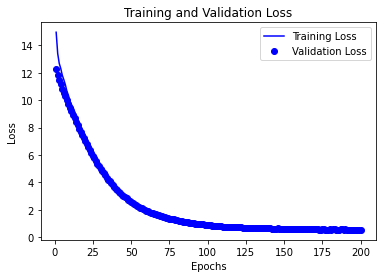

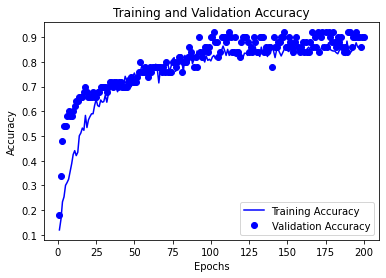

Training Loss & Accuracy: 
15/15 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.9443

Validation Loss & Accuracy: 
2/2 [==============================] - 0s 997us/step - loss: 0.5471 - accuracy: 0.9000

Test Loss & Accuracy: 
4/4 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.9200

Confusion Matrix:
 [[75  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  6  0  0  3]
 [ 0  1  0  1  0  1]
 [ 0  0  0  0  2  1]
 [ 2  0  0  0  0 29]]

Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        77
           1       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         9
           4       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           8       0.81      0.94      0.87        31

    accuracy                           0.92       125
   macro avg       0.91      0.76      0.79       125

In [34]:
# Tune the hyper parameters -> hidden units in both layers, epochs, batch size, learning rate
# For updating the L1, L2 regulalizer or drop out values, update in the function where the model is defined

history_snn, model_snn = train_model(x_train, y_train, x_val, y_val, num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                     epochs = 200, batch_size = 128, learning_rate = 0.001)

plot_learning(history_snn)

print('Training Loss & Accuracy: ') 
model_snn.evaluate(x_train, y_train)

print('\nValidation Loss & Accuracy: ')
model_snn.evaluate(x_val, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_snn.evaluate(x_test, y_test)

print_metrics(model_snn, x_test, y_test, target_dict)

In [25]:
def build_ml_model(x_train, y_train, x_test, y_test, target_dict, model):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    print('Train Accuracy : %.4f' % train_acc)
    print('Test Accuracy  : %.4f' % test_acc)

    y_test_pred = model.predict(x_test)

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))
    
    return (model)

In [26]:
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(cv = 5, max_iter = 1000, random_state = 32, n_jobs = -1,
                                #Cs = np.linspace(-20, 1, 5))
                                Cs = [1, 0.001, 0.1, 0.01, -1, -0.1])
model_lr = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_lr)

Train Accuracy : 0.9900
Test Accuracy  : 0.9440

Confusion Matrix:
 [[77  0  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  6  0  0  3]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 3  0  0  0  0 28]]

Classification Report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.50      0.67         2
           3       0.86      0.67      0.75         9
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           8       0.90      0.90      0.90        31

    accuracy                           0.94       125
   macro avg       0.95      0.84      0.88       125
weighted avg       0.94      0.94      0.94       125



In [27]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB(alpha = 7000)
model_nb = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_nb)

Train Accuracy : 0.8457
Test Accuracy  : 0.8400

Confusion Matrix:
 [[76  0  0  0  0  1]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  3]
 [ 2  0  0  0  0 29]]

Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           8       0.62      0.94      0.74        31

    accuracy                           0.84       125
   macro avg       0.27      0.32      0.29       125
weighted avg       0.75      0.84      0.79       125



In [28]:
from sklearn.svm import LinearSVC

model_lsvc = LinearSVC(max_iter = 1000, C = 0.001)
model_lsvc = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_lsvc)

Train Accuracy : 0.8838
Test Accuracy  : 0.8000

Confusion Matrix:
 [[74  0  2  0  0  1]
 [ 0  0  1  1  0  0]
 [ 0  0  4  0  3  2]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  2  1]
 [ 5  0  3  3  0 20]]

Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.00      0.00      0.00         2
           3       0.40      0.44      0.42         9
           4       0.00      0.00      0.00         3
           6       0.40      0.67      0.50         3
           8       0.74      0.65      0.69        31

    accuracy                           0.80       125
   macro avg       0.41      0.45      0.43       125
weighted avg       0.80      0.80      0.80       125



In [29]:
from sklearn.ensemble import RandomForestClassifier

maximum_features = 10

model_rf = RandomForestClassifier(n_jobs = -1, random_state = 32, oob_score = 'True', criterion = 'gini', 
                                  #n_estimators = 150, max_depth = 5)
                                  n_estimators = 5, max_depth = 3, max_features = maximum_features)
                                  
model_rf = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_rf)

Train Accuracy : 0.8096
Test Accuracy  : 0.7600

Confusion Matrix:
 [[77  0  0  0  0  0]
 [ 0  0  1  0  0  1]
 [ 1  0  3  0  0  5]
 [ 0  0  0  0  0  3]
 [ 1  0  1  0  0  1]
 [16  0  0  0  0 15]]

Classification Report:
                precision    recall  f1-score   support

           0       0.81      1.00      0.90        77
           1       0.00      0.00      0.00         2
           3       0.60      0.33      0.43         9
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           8       0.60      0.48      0.54        31

    accuracy                           0.76       125
   macro avg       0.34      0.30      0.31       125
weighted avg       0.69      0.76      0.72       125



In [30]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(n_jobs = -1, random_state = 32, verbosity = 0, 
                           n_estimators = 1, max_depth = 1, learning_rate = 0.01)
                                  
model_xgbc = build_ml_model(x_train_val, y_train_val, x_test, y_test, target_dict, model_xgbc)

Train Accuracy : 0.8076
Test Accuracy  : 0.7680

Confusion Matrix:
 [[70  0  0  0  0  7]
 [ 0  0  0  0  2  0]
 [ 0  0  6  0  1  2]
 [ 1  1  1  0  0  0]
 [ 0  0  0  0  2  1]
 [13  0  0  0  0 18]]

Classification Report:
                precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.00      0.00      0.00         2
           3       0.86      0.67      0.75         9
           4       0.00      0.00      0.00         3
           6       0.40      0.67      0.50         3
           8       0.64      0.58      0.61        31

    accuracy                           0.77       125
   macro avg       0.46      0.47      0.45       125
weighted avg       0.74      0.77      0.75       125



In [38]:
models_dict = {'Logistic Regression': model_lr, 
               'Multinomial NB': model_nb, 
               'Linear SVC': model_lsvc, 
               'Random Forest Classifier': model_rf, 
               'XGBoost Classifier': model_xgbc,
               'Simple NN': model_snn}

def model_perf(x, y, model): 
    if model_name == 'Simple NN':
        loss, accuracy = model.evaluate(x, y)
    else:
        accuracy = model.score(x, y)
    return (accuracy)

results = []
  
for model_name, model in models_dict.items():
    accuracy_train = model_perf(x_train, y_train, model)
    accuracy_val = model_perf(x_val, y_val, model)
    accuracy_test = model_perf(x_test, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])

column = ['Model name', 'Training Acc', 'Val Acc', 'Test Acc']

df_results = pd.DataFrame(results, columns = column)
df_results.sort_values(by = ['Test Acc'], ascending = False, inplace = True)
df_results.reset_index(drop = True, inplace = True)
df_results.round(4)

4/4 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.9200


,Model name,Training Acc,Val Acc,Test Acc
0,Logistic Regression,0.9889,1.00,0.944
1,Simple NN,0.9443,0.90,0.920
2,Multinomial NB,0.8463,0.84,0.840
3,Linear SVC,0.8976,0.76,0.800
4,XGBoost Classifier,0.8085,0.80,0.768
5,Random Forest Classifier,0.8062,0.84,0.760
